## Polytope Climate-DT Time Series example notebook for story nudging

This notebook shows how to use earthkit-data and earthkit-plots to pull destination-earth data from LUMI and plot it using earthkit-plots.

Before running the notebook you need to set up your credentials. See the main readme of this repository for different ways to do this or use the following cells to authenticate.

You will need to generate your credentials using the desp-authentication.py script.

This can be run as follows:

In [ ]:
%%capture cap
%run ../desp-authentication.py

This will generate a token that can then be used by earthkit and polytope.

In [ ]:
output_1 = cap.stdout.split('}\n')
access_token = output_1[-1][0:-1]

# Requirements
To run this notebook install the following:
* pip install earthkit-data
* pip install earthkit-plots
* pip install earthkit-regrid  (Optional for spectral variables)
* pip install cf-units         (Optional for unit conversion in maps)

If you do not have eccodes installed please install eccodes using conda as it is a dependency of earthkit, or install earthkit via conda

* conda install eccodes -c conda-forge
* conda install earthkit-data -c conda-forge

In [ ]:
# This request matches multiple parameter of the climate DT
 
import earthkit.data

LOCATION = ((38, -9.5))


request = {
     "activity": "story-nudging",
     "class": "d1",
     "dataset": "climate-dt",
     "experiment": "cont",
     "generation": "1",
     "levtype": "sfc",
     "date": "20180205/to/20180220",
     "model": "ifs-fesom",
     "expver": "0001",
     "param": "165",
     "realization": "1",
     "resolution": "high",
     "stream": "clte",
     "type": "fc",
     "time": "0000",
     "feature": {
         "type": "timeseries",
         "points": [[38, -9.5]],
         "time_axis": "date",
     }
 }

ds = earthkit.data.from_source("polytope", "destination-earth", request, stream=False, address='polytope.lumi.apps.dte.destination-earth.eu')


In [ ]:
ds._json()

In [2]:
def location_to_string(location):
    """
    Converts latitude and longitude to a string representation with degrees
    and N/S/E/W.
    """
    (lat, lon) = location
    lat_dir = "N" if lat >= 0 else "S"
    lon_dir = "E" if lon >= 0 else "W"
    return f"{abs(lat):.2f}°{lat_dir}, {abs(lon):.2f}°{lon_dir}"

In [3]:
da = ds.to_xarray()
da

<xarray.Dataset> Size: 368B
Dimensions:    (latitude: 1, longitude: 1, levelist: 1, number: 1, datetime: 1,
                t: 16)
Coordinates:
  * latitude   (latitude) float64 8B 38.02
  * longitude  (longitude) float64 8B 350.5
  * levelist   (levelist) int64 8B 0
  * number     (number) int64 8B 0
  * datetime   (datetime) <U20 80B '2018-02-20 00:00:00Z'
  * t          (t) datetime64[ns] 128B 2018-02-05 2018-02-06 ... 2018-02-20
Data variables:
    10u        (latitude, longitude, levelist, number, datetime, t) float64 128B ...
Attributes: (12/14)
    activity:       story-nudging
    class:          d1
    dataset:        climate-dt
    experiment:     cont
    expver:         0001
    generation:     1
    ...             ...
    realization:    1
    resolution:     high
    stream:         clte
    type:           fc
    number:         0
    Forecast date:  2018-02-20 00:00:00Z

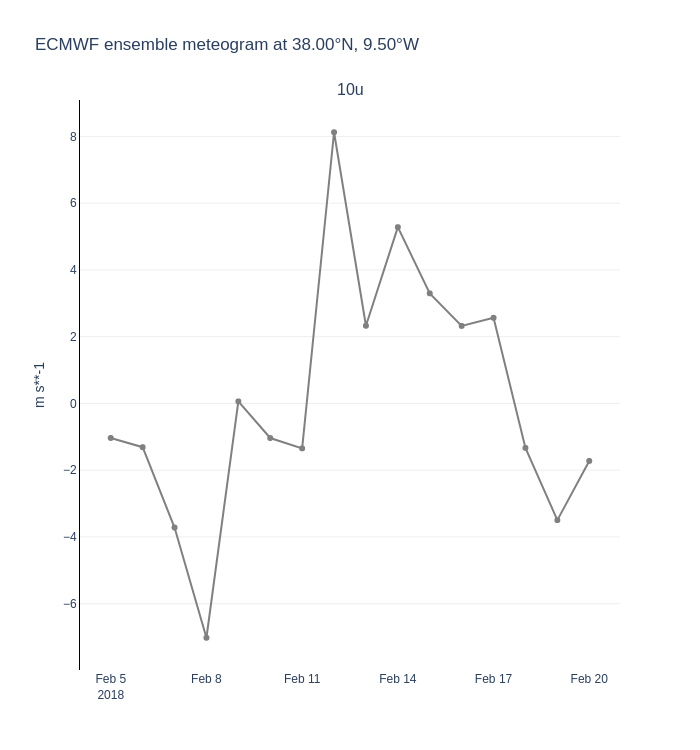

In [4]:
from earthkit.plots.interactive import Chart

TIME_FREQUENCY = "1d"
QUANTILES = [0, 0.1, 0.25, 0.5, 0.75, 0.9, 1]

chart = Chart()
chart.title(f"ECMWF ensemble meteogram at {location_to_string(LOCATION)}")
#chart.box(ds, time_frequency=TIME_FREQUENCY, quantiles=QUANTILES)
chart.line(ds, line_color='grey', time_frequency=TIME_FREQUENCY)
chart.show("png")  # Replace with chart.show() in an interactive session!